In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
def lagrange(i,q,x):
    return product([(x-qj)/(q[i]-qj) for qj in q if qj != q[i]], axis=0)
def cheb(n):
        return numpy.polynomial.chebyshev.chebgauss(n)[0]*.5+.5

In [50]:
x = linspace(0,1,1025)
q = array([0,.2,.5,.8,1])
y = array([lagrange(i,q,x) for i in range(len(q))])

In [21]:
y.shape

(5, 1025)

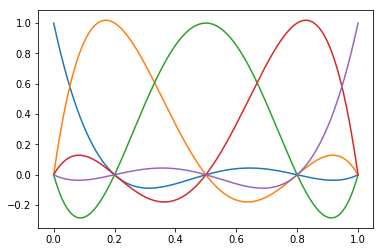

In [22]:
_ = plot(x,y.T)

In [174]:
def myfun(x):
    return sin(3*numpy.pi*x)

def myfun(x):
    return 1/(1+100*(x-.5)**2)

In [83]:
p=y.T.dot(myfun(q))
f = myfun(x)

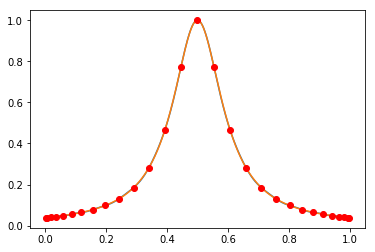

In [84]:
plot(x,p)
plot(x,f)
plot(q,myfun(q),'or')

In [85]:
linfty = max(abs(f-p))
linfty

0.0030771838630252457

In [86]:
def error(q, myfun):
    y = array([lagrange(i,q,x) for i in range(len(q))])
    p=y.T.dot(myfun(q))
    f = myfun(x)
    return max((f-p))
    

In [121]:
N = range(4,31)
ERROR = []
error_equispaced = []
for n in N:
    q = linspace(0,1,n)
    error_equispaced.append(error(q,myfun))


In [123]:
N = range(4,31)
error_cheb = [] #chebychev behaivour
for n in N:
    q = cheb(n)
    error_cheb.append(error(q,myfun))

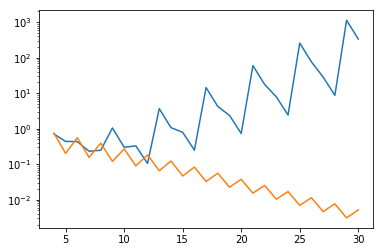

In [124]:
semilogy(N,error_equispaced)
semilogy(N,error_cheb)

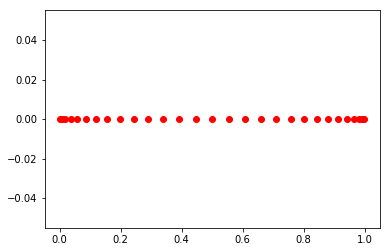

In [119]:
# chebychev points
c= cheb(n)
plot(c, 0*c, 'or')

In [137]:

def binomial(n, k):
    """
    A fast way to calculate binomial coefficients by Andrew Dalke.
    See http://stackoverflow.com/questions/3025162/statistics-combinations-in-python
    """
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

In [162]:
print(binomial(5,3))

n = 10
q = array([i/n for i in range(n)])
q
def b(i,q,x):
    n=len(q)
    return binomial(n,i)*((1-x)**n-i)*x**(i)

y = array([b(i,q,x) for i in range(n)])
p=y.T.dot(myfun(q))
_ = plot(x,y.T)

10


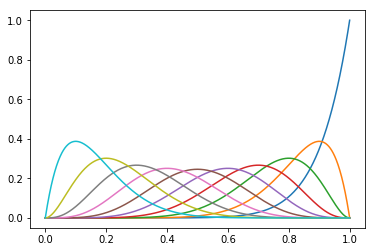

In [165]:
import scipy.special
def bernstein(i,q,x):
    n= len(q)-1
    return scipy.special.binom(n,i)*((1-x)**(n-i))*x**i

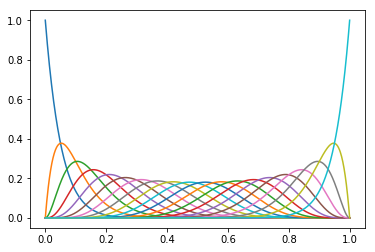

In [176]:
n=20
q = array([i/n for i in range(n)])
y = array([bernstein(i,q,x) for i in range(n)])
p=y.T.dot(myfun(q))
_ = plot(x,y.T)


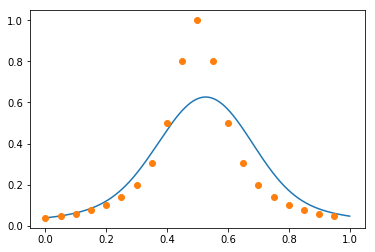

In [177]:
plot(x,p)
plot(q,myfun(q), 'o')

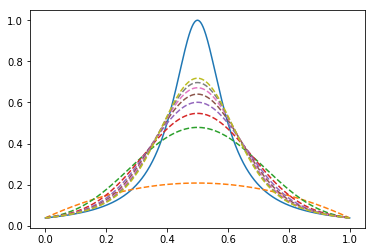

In [183]:
N=range(4,41,5)
plot(x,myfun(x))
for n in N:
    q = linspace(0,1,n)
    y = array([bernstein(i,q,x) for i in range(n)])
    p=y.T.dot(myfun(q))
    _ = plot(x,p, '--')
    

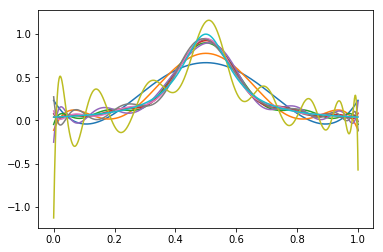

In [216]:
# Now we solve the interpolation using the best approximation (f-p,q) for all q in P^n (using L2 norm)
import scipy.integrate


N = range(5,30,3)
for n in N:
    M = zeros([n,n])
    for i in range(n):
        for j in range(n):
            M[i,j]=1.0/(i+j+1)
    F = array([scipy.integrate.quad(lambda x: myfun(x)*x**i,0,1)[0] for i in range(n)])
    pi = linalg.solve(M,F)
    p = sum([x**i*pi[i] for i in range(n)], axis=0 )
    plot(x,p)
plot(x,myfun(x))